# answers

1 - o3 and no2

what is your test error? (Be sure to include units and the metric you used).
   
    i used mean square error - test error was 26.27466737041426 ppb^2

Do you think a linear model performs well? Why/why not?
    
    i think it sort of does - last week when we just plotted the data w no linear fit i could tell the two variables seemed to have a 
    general linear relationship with a negative slope but there were still a good number of points that didn't fit a single line. The mean
    squared error being 26 isn't super awesome. i would say the linear model is sort of ok but not the best option.

2 - mauna loa 

Test your linear model on data after 2000. How well does it perform?
   
    I think it performs pretty well. The MSE is 7.2525645320304655 ppm^2 so for this specific timeframe plotted it fits pretty nicely.
    
Do you think a linear model performs well? Why/why not?

    I don't really think a linear model makes sense for this data if you're looking outside of just this specific time range because last 
    week when we plotted the data w no model, it looked like the CO2 levels are actually curved upwards, ie increasing exponentially a little
    bit, so a linear model would only make sense for a zoomed in portion of the graph. Outside of that, I think it would start to be 
    inaccurate. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
# no2 and o3 data 
epadata = pd.read_csv('/Users/katherinemottola/Desktop/important/school/GEOL599/1_24_24/LA_AQS_2023.csv')

# Mauna Loa data
mldata = pd.read_csv('/Users/katherinemottola/Desktop/important/school/GEOL599/2_14_24/ManuaLoa_CO2.csv')

In [4]:
# separate out the data i want 

o3 = epadata[(epadata['Parameter Name']=='Ozone')& (epadata['Duration Description']=='1 HOUR')]

no2 = epadata[(epadata['Parameter Name']== 'Nitrogen dioxide (NO2)')& (epadata['Duration Description']=='1 HOUR')]

In [5]:
# merging o3 and no2 data around date

df_1 = pd.DataFrame(data = {"Mean O3" : o3['Arithmetic Mean'], 'date' : o3['Date (Local)']})
df_2 = pd.DataFrame(data = {"Mean NO2" : no2['Arithmetic Mean'], 'date' : no2['Date (Local)']})
df_all = df_1.merge(df_2, on=['date'])

In [6]:
df_all2 = df_all[['Mean O3','Mean NO2']].copy()

In [7]:
df_all2['Mean O3'] = df_all2['Mean O3'] *1000

In [8]:
df_all2

,Mean O3,Mean NO2
0,31.708,4.816667
1,31.708,4.550000
2,31.708,4.550000
3,31.708,4.816667
4,15.792,14.720833
...,...,...
1087,39.048,8.614286
1088,30.042,6.370833
1089,30.042,6.370833
1090,30.042,7.362500


In [9]:
o3x = pd.DataFrame(df_all2['Mean O3'])  #for ppb
no2y = pd.DataFrame(df_all2['Mean NO2'])

In [10]:
# The method takes arrays as input. The input should be 2D, the output: 1D!
# check types, not that i think they're already arrays but bc idk. anyway both are dataframes bc i made them dataframes LOL

print('Type: ', type(o3x))
print('Type: ', type(no2y))

Type:  <class 'pandas.core.frame.DataFrame'>
Type:  <class 'pandas.core.frame.DataFrame'>


In [11]:
# so we need to make them into arrays so we can use them 
# i dont think it matters which is x and y but in fact maybe i will just keep them as o3 and no2 lol

# i thiiiink i can leave it ? i dont think i need to reshape but will return and see
o3x = np.array(o3x)

no2y = np.array(no2y)

In [12]:
# Xtrain and xtest are from o3xarray, ytrain and ytest are from no2yarray

X_train, X_test, y_train, y_test = train_test_split(o3x, no2y, test_size=0.2)


In [13]:
# rename linearregression as reg for ease of use

reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [14]:
print("Coefficients: \n", reg.coef_)
print("Intercept: \n", reg.intercept_)

# negative slope is correct

Coefficients: 
 [[-0.54952681]]
Intercept: 
 [28.63288814]


In [15]:
yPred = reg.predict(o3x)
df_all2['yPred'] = yPred

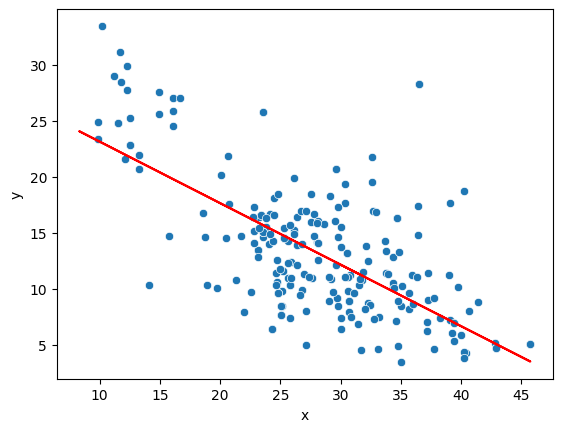

In [16]:
#Plot Test Data

# ravel takes an array and turns it back into a series so that we can put them back into dataframes and plot and stuff again 
df_test = pd.DataFrame({'x' : X_test.ravel(), 'y' : y_test.ravel()})

# make predictions using the test data, plug it back into your dataframe
df_test['yPred'] = reg.predict(X_test)


#scatterplot of data
sns.scatterplot(data=df_test, x="x", y="y")

# this is the linear regression plot
plt.plot(df_all2['Mean O3'], df_all2['yPred'], color='r')

## god knows if this is right. moving on

In [17]:
# Error

mean_squared_error(df_test['y'],df_test['yPred'])

# in ppb 

21.6998267091503

In [18]:
# does it perform well?

In [19]:
mldata

,year,month,decimal date,average,deseasonalized,ndays,sdev,unc
0,1958,3,1958.2027,315.70,314.43,-1,-9.99,-0.99
1,1958,4,1958.2877,317.45,315.16,-1,-9.99,-0.99
2,1958,5,1958.3699,317.51,314.71,-1,-9.99,-0.99
3,1958,6,1958.4548,317.24,315.14,-1,-9.99,-0.99
4,1958,7,1958.5370,315.86,315.18,-1,-9.99,-0.99
...,...,...,...,...,...,...,...,...
786,2023,9,2023.7083,418.51,421.96,18,0.30,0.14
787,2023,10,2023.7917,418.82,422.12,27,0.47,0.17
788,2023,11,2023.8750,420.46,422.43,21,0.91,0.38
789,2023,12,2023.9583,421.86,422.56,20,0.70,0.30


In [20]:
before_training = mldata[mldata['year'] <= 1999]
before_training = before_training[['year', 'average']]

train_xvals = np.array(before_training['year']).reshape((-1,1))
train_yvals = np.array(before_training['average']).reshape((-1,1))

In [21]:
after_test = mldata[mldata['year'] <= 2000]
after_test = after_test[['year', 'average']]

test_xvals = np.array(after_test['year']).reshape((-1,1))
test_yvals = np.array(after_test['average']).reshape((-1,1))

In [22]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(train_xvals, train_yvals, test_size=0.2)

In [23]:
# reg2

reg2 = linear_model.LinearRegression()
reg2.fit(X_train2,y_train2)



LinearRegression()

In [24]:
print("Coefficients: \n", reg2.coef_)
print("Intercept: \n", reg2.intercept_)


Coefficients: 
 [[1.33114992]]
Intercept: 
 [-2295.56408357]


In [25]:
yPred2 = reg2.predict(train_xvals)
before_training['yPred'] = yPred2

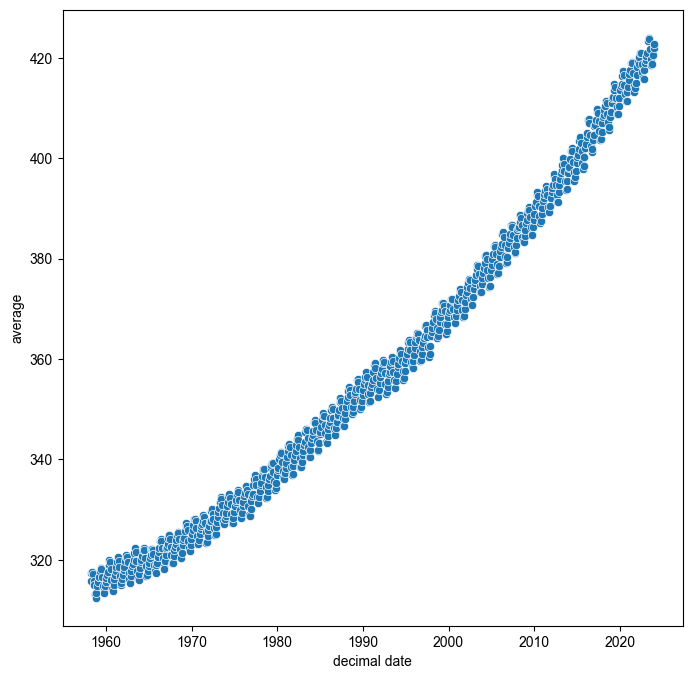

In [26]:
# normal plot for comparison 

fig, ax = plt.subplots(figsize=(8,8))

sns.set_theme(style="white")
norm = sns.scatterplot(data=mldata, x="decimal date", y="average")


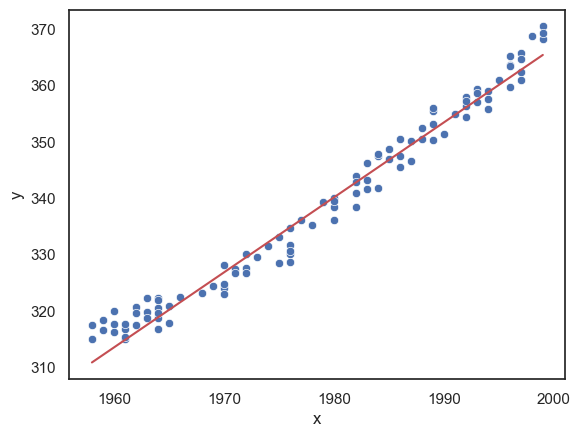

In [27]:
#Plot Test Data

# ravel takes an array and turns it back into a series so that we can put them back into dataframes and plot and stuff again 
after_test = pd.DataFrame({'x' : X_test2.ravel(), 'y' : y_test2.ravel()})

# make predictions using the test data, plug it back into your dataframe
after_test['yPred'] = reg2.predict(X_test2)


#scatterplot of data
sns.scatterplot(data=after_test, x="x", y="y")

# this is the linear regression plot
plt.plot(before_training['year'], before_training['yPred'], color='r')

## it looks.. suspiciously nice 

In [28]:
# Error

mean_squared_error(after_test['y'],after_test['yPred'])

# in ppm i believe

7.2525645320304655